<a href="https://colab.research.google.com/github/alexjreynolds50/PGA-TOUR-DRIVING-DISTANCE-ANALYSIS/blob/main/Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2017 PGA Tour Data Analysis on Importance of Driving Distance

##Import Libraries and Dataset into Notebook

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Import dataset into notebook

In [97]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [98]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/PGATOUR_meta2.csv')

##Introduction into Dataset and Analysis

**Introduction to dataset:**
*   Dataset found on Kaggle.com
*   Data collected from the 2017 Professional Golfers Association (PGA) Tour season
*   Includes 195 players and 70 variables


---

**Purpose of analysis:**
*   Analyze importance of driving distance off the tee to success in golf.
*   Working to increase driving distance has been linked to shorter golfing careers on PGA tour due to injuries from increased torque forces on joints but especially on players backs.
*   Analysis will help make better decisions on whether chasing increased driving distance off the tee is worth the risk of increased injury and/or shorter career.
*   Analysis would be benefical to any golfers but especially the competitive golfer and any fitness professional who works with golfers on increasing their strength, flexibility, and power to increase their driving distance off the tee.


---


**Key infomation with Analysis**
*   Golf is one of the few sports where you are trying to shoot a low score. So the lower the score, the better.
*   Strokes gained is a statistic the measures how many strokes are gained on the field from various shots on each holes.  The more stroked gained the better.





##Hypotheses

**Hypothesis 1:**
*   HO = Players with higher average driving distance will not have more success on PGA Tour.
*   HA = Players with higher average driving distance will have more success on PGA Tour.

---

**Hypothesis 2:**
*   HO = Players with higher average driving distance will not have better strokes gained per round
*   HA = Players with higher average driving distance will have better strokes gained per round

---

**Hypothesis 3:**
*   HO = Players with higher average driving distance will not have lower scoring averages
*   HA = Players with higher average driving distance will have lower scoring averages


##Exploratory Dataset Analysis and Wrangle


Includes 195 players and 71 columns

In [99]:
df.shape

(195, 71)

Columns in dataset

In [100]:
df.columns

Index(['Player', 'EVENTS_PLAYED', 'POINTS', 'NUMBER_OF_WINS',
       'NUMBER_OF_TOP_Tens', 'POINTS_BEHIND_LEAD', 'ROUNDS_PLAYED',
       'SG_PUTTING_PER_ROUND', 'TOTAL_SG:PUTTING', 'MEASURED_ROUNDS',
       'AVG_Driving_DISTANCE', 'UP_AND_DOWN_%', 'PAR_OR_BETTER', 'MISSED_GIR',
       'FAIRWAY_HIT_%', 'FAIRWAYS_HIT', 'POSSIBLE_FAIRWAYS', 'GIR_RANK',
       'GOING_FOR_GREEN_IN_2%', 'ATTEMPTS_GFG', 'NON-ATTEMPTS_GFG',
       'RTP-GOING_FOR_THE_GREEN', 'RTP-NOT_GOING_FOR_THE_GRN', 'HOLE_OUTS',
       'SAND_SAVE%', 'NUMBER_OF_SAVES', 'NUMBER_OF_BUNKERS', 'TOTAL_O/U_PAR',
       'Three_PUTT%', 'TOTAL_3_PUTTS', 'SG_PER_ROUND', 'SG:OTT', 'SG:APR',
       'SG:ARG', 'DRIVES_320+%', 'TOTAL_DRIVES_FOR_320+', 'TOTAL_DRIVES',
       'ROUGH_TENDNECY%', 'TOTAL_ROUGH', 'FAIRWAY_BUNKER%',
       'TOTAL_FAIRWAY_BUNKERS', 'AVG_CLUB_HEAD_SPEED', 'FASTEST_CH_SPEED',
       'SLOWEST_CH_SPEED', 'AVG_BALL_SPEED', 'FASTEST_BALL_SPEED',
       'SLOWEST_BALL_SPEED', 'AVG_SMASH_FACTOR', 'HIGHEST_SF', 'LOWEST_SF',

Look at dtypes of columns and quick look at null values

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 71 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player                     195 non-null    object 
 1   EVENTS_PLAYED              195 non-null    int64  
 2   POINTS                     195 non-null    int64  
 3   NUMBER_OF_WINS             195 non-null    int64  
 4   NUMBER_OF_TOP_Tens         195 non-null    int64  
 5   POINTS_BEHIND_LEAD         194 non-null    float64
 6   ROUNDS_PLAYED              195 non-null    int64  
 7   SG_PUTTING_PER_ROUND       195 non-null    float64
 8   TOTAL_SG:PUTTING           195 non-null    float64
 9   MEASURED_ROUNDS            195 non-null    int64  
 10  AVG_Driving_DISTANCE       195 non-null    float64
 11  UP_AND_DOWN_%              195 non-null    float64
 12  PAR_OR_BETTER              195 non-null    int64  
 13  MISSED_GIR                 195 non-null    int64  

All data is int64 or float64 except PLAYER, COUNTRY, FAIRWAYS_HIT, and TOTAL_DRIVES

Will need to convert FAIRWAYS_HIT and TOTAL_DRIVES to int64 for analysis

In [162]:
df.FAIRWAYS_HIT.max()

1060

In [163]:
df.TOTAL_DRIVES.max()

1344

Both FAIRWAY_HIT and TOTAL_DRIVES have values greater than 1000 and contain commas leading to object dtypes. 

Lets remove commas and change to int64 dtypes

In [104]:
df.FAIRWAYS_HIT = df.FAIRWAYS_HIT.str.replace(',','')
df.FAIRWAYS_HIT = df.FAIRWAYS_HIT.astype('int64')
df.TOTAL_DRIVES = df.TOTAL_DRIVES.str.replace(',','')
df.TOTAL_DRIVES = df.TOTAL_DRIVES.astype('int64')

In [105]:
df.FAIRWAYS_HIT.dtypes
df.TOTAL_DRIVES.dtypes

dtype('int64')

All appropriate columns converted to int64 dtypes for analysis

5 row sample of dataset

In [106]:
df.sample(5)

,Player,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,AVG_Driving_DISTANCE,UP_AND_DOWN_%,PAR_OR_BETTER,MISSED_GIR,FAIRWAY_HIT_%,FAIRWAYS_HIT,POSSIBLE_FAIRWAYS,GIR_RANK,GOING_FOR_GREEN_IN_2%,ATTEMPTS_GFG,NON-ATTEMPTS_GFG,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,HOLE_OUTS,SAND_SAVE%,NUMBER_OF_SAVES,NUMBER_OF_BUNKERS,TOTAL_O/U_PAR,Three_PUTT%,TOTAL_3_PUTTS,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,DRIVES_320+%,TOTAL_DRIVES_FOR_320+,TOTAL_DRIVES,ROUGH_TENDNECY%,TOTAL_ROUGH,FAIRWAY_BUNKER%,TOTAL_FAIRWAY_BUNKERS,AVG_CLUB_HEAD_SPEED,FASTEST_CH_SPEED,SLOWEST_CH_SPEED,AVG_BALL_SPEED,FASTEST_BALL_SPEED,SLOWEST_BALL_SPEED,AVG_SMASH_FACTOR,HIGHEST_SF,LOWEST_SF,AVG_LAUNCH_ANGLE,LOWEST_LAUNCH_ANGLE,STEEPEST_LAUNCH_ANGLE,AVG_SPIN_RATE,HIGHEST_SPIN_RATE,LOWEST_SPIN_RATE,AVG_HANG_TIME,LONGEST_ACT.HANG_TIME,SHORTEST_ACT.HANG_TIME,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE,MONEY,COUNTRY
158,Sam Saunders,26,437,0,4,5180.0,80,0.094,6.304,67,302.8,55.79,260,466,60.14,620,1031,132,67.67,157,75,-97,-1,15,51.75,74,143,46,2.25,30,0.132,0.350,-0.081,-0.138,12.74,119,934,29.25,270,6.7,62,113.47,118.35,109.50,170.67,175.55,164.79,1.504,1.518,1.464,9.77,4.63,14.58,2344.5,4251,1658,6.5,8.0,2.8,285.0,309.5,249.1,70.794,5208,74,17.49,233,1332,33,981936,United States
99,Keith Mitchell,28,839,0,4,4778.0,95,-0.509,-40.194,79,312.9,56.48,292,517,58.19,757,1301,36,71.72,208,82,-123,-9,18,49.28,68,138,38,4.18,73,0.534,0.742,-0.118,-0.090,24.96,290,1162,29.78,344,6.8,79,124.67,129.08,118.42,181.57,187.50,176.57,1.456,1.510,1.379,11.07,7.78,13.72,2757.8,6329,1541,6.5,7.9,3.2,295.7,322.3,262.9,70.920,6819,97,16.44,287,1746,34,1615520,United States
60,Dustin Johnson,18,3289,3,11,2328.0,69,0.503,25.126,50,314.5,63.31,214,338,57.96,506,873,27,68.50,137,63,-94,-7,13,50.63,40,79,21,1.67,21,1.987,1.006,0.824,0.157,33.29,253,760,32.00,240,4.0,30,121.60,126.61,118.55,181.43,185.56,176.55,1.492,1.518,1.459,11.89,6.79,15.88,2713.8,8766,1716,6.6,8.1,3.2,299.7,333.6,275.7,68.702,4799,70,12.54,158,1260,34,7761652,United States
78,J.J. Spaun,26,880,0,4,4737.0,81,-0.167,-11.191,67,298.9,55.79,236,423,65.71,690,1050,44,56.85,137,104,-71,-7,9,44.17,53,120,51,2.95,42,0.529,0.319,0.453,-0.244,9.26,92,994,24.34,241,5.6,55,114.51,120.32,110.39,167.18,173.02,161.21,1.460,1.506,1.404,11.50,7.18,14.79,2467.2,3305,1555,6.4,7.7,3.9,275.6,310.9,245.4,70.525,5537,79,15.96,227,1422,29,1953166,United States
75,Ian Poulter,19,1061,1,4,4556.0,69,0.170,7.156,42,293.4,58.56,195,333,65.31,512,784,96,49.68,77,78,-38,-20,8,51.46,53,103,38,2.08,24,0.815,0.193,0.454,0.168,6.70,43,642,25.82,165,6.9,44,111.62,114.32,109.82,167.36,170.28,164.31,1.499,1.515,1.463,11.54,8.25,14.11,2866.6,5667,2053,6.1,6.9,3.8,264.6,285.4,239.8,70.593,4519,64,16.23,187,1152,38,2692985,England


Descriptive Statistics across all columns

In [107]:
df.describe()

,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,AVG_Driving_DISTANCE,UP_AND_DOWN_%,PAR_OR_BETTER,MISSED_GIR,FAIRWAY_HIT_%,FAIRWAYS_HIT,POSSIBLE_FAIRWAYS,GIR_RANK,GOING_FOR_GREEN_IN_2%,ATTEMPTS_GFG,NON-ATTEMPTS_GFG,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,HOLE_OUTS,SAND_SAVE%,NUMBER_OF_SAVES,NUMBER_OF_BUNKERS,TOTAL_O/U_PAR,Three_PUTT%,TOTAL_3_PUTTS,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,DRIVES_320+%,TOTAL_DRIVES_FOR_320+,TOTAL_DRIVES,ROUGH_TENDNECY%,TOTAL_ROUGH,FAIRWAY_BUNKER%,TOTAL_FAIRWAY_BUNKERS,AVG_CLUB_HEAD_SPEED,FASTEST_CH_SPEED,SLOWEST_CH_SPEED,AVG_BALL_SPEED,FASTEST_BALL_SPEED,SLOWEST_BALL_SPEED,AVG_SMASH_FACTOR,HIGHEST_SF,LOWEST_SF,AVG_LAUNCH_ANGLE,LOWEST_LAUNCH_ANGLE,STEEPEST_LAUNCH_ANGLE,AVG_SPIN_RATE,HIGHEST_SPIN_RATE,LOWEST_SPIN_RATE,AVG_HANG_TIME,LONGEST_ACT.HANG_TIME,SHORTEST_ACT.HANG_TIME,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE,MONEY
count,195.000000,195.000000,195.000000,195.000000,194.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.00000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02
mean,24.174359,745.974359,0.241026,2.651282,4896.262887,78.358974,0.051708,3.111672,59.928205,296.756923,58.597897,256.615385,437.887179,61.053846,620.907692,1015.025641,97.923077,56.224821,124.148718,96.692308,-67.748718,-6.779487,10.994872,49.934462,61.984615,124.164103,40.189744,2.866923,38.815385,0.136246,0.042308,0.061779,0.032108,10.817179,92.230769,859.584615,28.773949,243.964103,6.109744,52.128205,113.997846,118.370051,110.116872,169.622667,174.298513,163.605231,1.487728,1.515636,1.431810,11.060974,7.00041,14.887333,2633.989744,5085.112821,1736.723077,6.347179,7.638462,3.209744,278.155385,305.030769,244.854359,70.893369,5328.810256,75.497436,16.483897,222.194872,1359.000000,32.887179,1.653204e+06
std,4.151805,700.518059,0.599277,2.201554,608.024609,14.039134,0.313897,18.320074,13.997606,8.191270,3.473569,53.353816,86.863725,5.079533,139.350784,201.438703,56.456709,9.138289,34.816950,31.008108,21.775647,9.887907,4.345275,5.791218,16.237121,29.040742,13.129407,0.642765,10.674991,0.752243,0.418211,0.396112,0.220894,6.999289,62.617256,195.369058,3.939820,59.698329,1.105403,15.032575,3.902298,4.183791,3.819907,5.764802,5.814774,6.076666,0.014070,0.005842,0.026439,1.382925,1.63012,1.631474,209.331951,1364.666542,219.316194,0.252676,0.331985,1.155827,10.060564,12.552019,13.149478,0.820646,1005.287126,14.465520,2.095008,41.704446,260.378571,5.668469,1.489543e+06
min,15.000000,10.000000,0.000000,0.000000,2328.000000,46.000000,-0.750000,-42.673000,30.000000,278.400000,44.010000,136.000000,227.000000,40.850000,268.000000,531.000000,1.000000,28.360000,38.000000,35.000000,-128.000000,-51.000000,1.000000,33.800000,23.000000,57.000000,15.000000,1.480000,12.000000,-3.586000,-1.585000,-1.586000,-0.924000,1.240000,8.000000,420.000000,16.670000,93.000000,3.100000,18.000000,105.270000,109.160000,102.150000,157.170000,160.260000,146.500000,1.423000,1.473000,1.337000,7.140000,1.25000,10.700000,2127.300000,2819.000000,1400.000000,5.500000,6.800000,0.500000,249.800000,271.600000,192.800000,68.702000,3261.000000,45.000000,12.200000,123.000000,810.000000,21.000000,2.487800e+04
25%,21.000000,267.500000,0.000000,1.000000,4592.750000,67.000000,-0.14650

Assess for null/empty values

In [108]:
num_na = df.isna().sum()
num_null = df.isnull().sum()
sort_num_na = num_na.sort_values(ascending=False)
sort_num_null = num_null.sort_values(ascending=False)
print(sort_num_na)
print(sort_num_null)

POINTS_BEHIND_LEAD    1
COUNTRY               0
NUMBER_OF_SAVES       0
ATTEMPTS_GFG          0
NON-ATTEMPTS_GFG      0
                     ..
AVG_SMASH_FACTOR      0
HIGHEST_SF            0
LOWEST_SF             0
AVG_LAUNCH_ANGLE      0
Player                0
Length: 71, dtype: int64
POINTS_BEHIND_LEAD    1
COUNTRY               0
NUMBER_OF_SAVES       0
ATTEMPTS_GFG          0
NON-ATTEMPTS_GFG      0
                     ..
AVG_SMASH_FACTOR      0
HIGHEST_SF            0
LOWEST_SF             0
AVG_LAUNCH_ANGLE      0
Player                0
Length: 71, dtype: int64


Only empty value has no consequence to analysis

##EDA of driving distance statistics

Descriptive Statistics of average driving distance column

In [109]:
df.AVG_Driving_DISTANCE.describe()

count    195.000000
mean     296.756923
std        8.191270
min      278.400000
25%      291.050000
50%      296.200000
75%      301.650000
max      320.200000
Name: AVG_Driving_DISTANCE, dtype: float64

Separate data into groups based on average driving distance for future analysis

Group 1: Over 300 yard average driving distance 

Group 2: Under 300 yard average driving distance 

Group 3: Top 50% average driving distance

Group 4: Bottom 50% average driving distance 

In [110]:
over_300_avg_driving_dist = df.AVG_Driving_DISTANCE >= 300
under_300_avg_driving_dist = df.AVG_Driving_DISTANCE < 300
top_50_driving_dist = df.AVG_Driving_DISTANCE >= 296.20
bottom_50_driving_dist = df.AVG_Driving_DISTANCE <= 296.20

Create new column for over 300 yard and top 50% drivers for future analysis

In [111]:
df['Over_300_yards']=over_300_avg_driving_dist
df['Top_50']=top_50_driving_dist

Create new dataframes for new groups

In [112]:
over_300_df = df.iloc[over_300_avg_driving_dist.values]
under_300_df = df.iloc[under_300_avg_driving_dist.values]
top_50_df = df.iloc[top_50_driving_dist.values]
bottom_50_df = df.iloc[bottom_50_driving_dist.values]

In [113]:
over_300_df.count()

Player                62
EVENTS_PLAYED         62
POINTS                62
NUMBER_OF_WINS        62
NUMBER_OF_TOP_Tens    62
                      ..
AGE                   62
MONEY                 62
COUNTRY               62
Over_300_yards        62
Top_50                62
Length: 73, dtype: int64

In [114]:
percent_over300 = (62/195) * 100
print(round(percent_over300, 2), 'percent of the dataset averages over 300 yards in driving distance.')

31.79 percent of the dataset averages over 300 yards in driving distance.


Confirm top 50 and bottom 50 dataframes are split evenly 

In [115]:
top_50_df.count()

Player                99
EVENTS_PLAYED         99
POINTS                99
NUMBER_OF_WINS        99
NUMBER_OF_TOP_Tens    99
                      ..
AGE                   99
MONEY                 99
COUNTRY               99
Over_300_yards        99
Top_50                99
Length: 73, dtype: int64

In [116]:
bottom_50_df.count()

Player                98
EVENTS_PLAYED         98
POINTS                98
NUMBER_OF_WINS        98
NUMBER_OF_TOP_Tens    98
                      ..
AGE                   98
MONEY                 98
COUNTRY               98
Over_300_yards        98
Top_50                98
Length: 73, dtype: int64

##Distribution of data

Obtain skewness and kurtosis values of data distribution

In [117]:
skew = df.skew(axis=0)
kurt = df.kurt(axis=0)



---


Visualize data distribution for average driving distance

The skewness is 0.37 and kurtosis is 0.04.


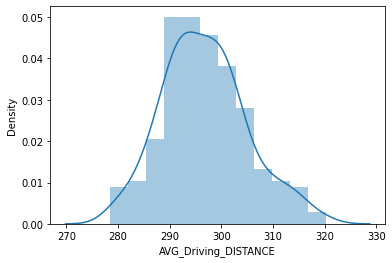

In [118]:
sns.distplot(df['AVG_Driving_DISTANCE'], kde=True)

print(f'The skewness is {round(skew.AVG_Driving_DISTANCE, 2)} and kurtosis is {round(kurt.AVG_Driving_DISTANCE,2)}.')

We see a normal distribution of the AVG_Driving_DISTANCE data



---


Visualize data distribution for Money

The skewness is 1.95 and kurtosis is 4.81.


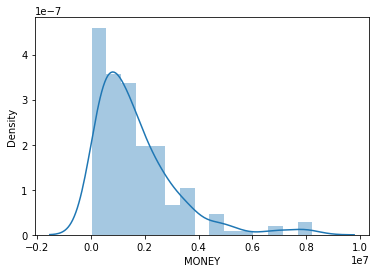

In [119]:
sns.distplot(df['MONEY'])

print(f'The skewness is {round(skew.MONEY, 2)} and kurtosis is {round(kurt.MONEY,2)}.')

There is a high positive skewness and kurtosis with the distribution of the MONEY data



---


Visualize data distribution for strokes gained per round

The skewness is -0.94 and kurtosis is 3.57.


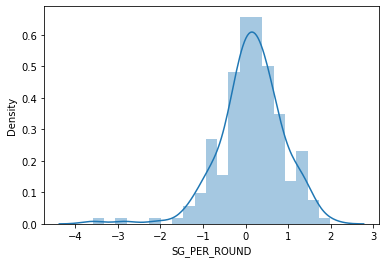

In [120]:
sns.distplot(df['SG_PER_ROUND'])

print(f'The skewness is {round(skew.SG_PER_ROUND, 2)} and kurtosis is {round(kurt.SG_PER_ROUND,2)}.')

There is a slight negative skewness and moderate kurtosis with the distribution of the SG_PER_ROUND data



---


Visualize data distribution for average score

The skewness is 0.78 and kurtosis is 3.15.


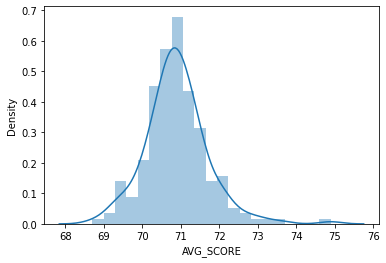

In [121]:
sns.distplot(df['AVG_SCORE'])

print(f'The skewness is {round(skew.AVG_SCORE, 2)} and kurtosis is {round(kurt.AVG_SCORE,2)}.')

We see a normal distribution of the AVG_SCORE data with slightly postivie skewness and moderate kurtosis


##Hypothesis 1 Analysis


*   **HO = Players with higher average driving distance will not have more success on PGA Tour.**
*   **HA = Players with higher average driving distance will have more success on PGA Tour.** 




For purpose of this analysis, success on PGA Tour will include numbers of wins, top 10s, and money earned.



---


Create list of variables for H1 analysis

In [122]:
h1_list = (['AVG_Driving_DISTANCE', 'NUMBER_OF_WINS', 'NUMBER_OF_TOP_Tens', 'MONEY'])



---


Descriptive Statistics for H1 in Bottom 50%, Top 50%, and Over 300 yard driving distance groupings

In [123]:
bottom_50_df[h1_list].describe()

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,MONEY
count,98.000000,98.000000,98.000000,9.800000e+01
mean,290.298980,0.142857,2.122449,1.204137e+06
std,4.222143,0.351726,1.812132,9.446331e+05
min,278.400000,0.000000,0.000000,2.487800e+04
25%,287.950000,0.000000,1.000000,4.411060e+05
50%,291.050000,0.000000,2.000000,9.386740e+05
75%,293.350000,0.000000,3.000000,1.815034e+06
max,296.200000,1.000000,8.000000,4.691667e+06


In [124]:
top_50_df[h1_list].describe()

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,MONEY
count,99.000000,99.000000,99.000000,9.900000e+01
mean,303.138384,0.333333,3.181818,2.107215e+06
std,5.687055,0.755929,2.421686,1.776043e+06
min,296.200000,0.000000,0.000000,8.910400e+04
25%,299.000000,0.000000,1.000000,7.952340e+05
50%,301.600000,0.000000,3.000000,1.595942e+06
75%,305.900000,0.000000,4.500000,2.761220e+06
max,320.200000,3.000000,11.000000,8.225921e+06


In [125]:
over_300_df[h1_list].describe()

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,MONEY
count,62.000000,62.000000,62.000000,6.200000e+01
mean,306.083871,0.435484,3.564516,2.373406e+06
std,5.240172,0.880033,2.551894,2.008144e+06
min,300.000000,0.000000,0.000000,8.910400e+04
25%,302.425000,0.000000,2.000000,1.000609e+06
50%,303.800000,0.000000,3.000000,1.611929e+06
75%,309.475000,0.000000,5.000000,3.373650e+06
max,320.200000,3.000000,11.000000,8.225921e+06


We see an increase in means and medians across wins, top 10s, and money won as the groupings increase in average driving distance. 



---


Next lets look at correlations between these variables

In [126]:
h1_list_corr_df = df[h1_list].corr()
h1_list_corr_df

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,MONEY
AVG_Driving_DISTANCE,1.000000,0.310112,0.390101,0.447671
NUMBER_OF_WINS,0.310112,1.000000,0.525058,0.767855
NUMBER_OF_TOP_Tens,0.390101,0.525058,1.000000,0.874703
MONEY,0.447671,0.767855,0.874703,1.000000


We notice positive correlations between average driving distance, wins, top 10s, and money won.  With highest correlation between average driving distance and money won at 0.447.

Heatmap of correlations with the more red being closer to .30 postitive correlation and the more green close to 1.0 positive correlation

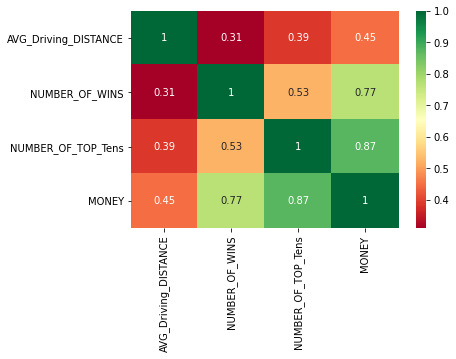

In [127]:
sns.heatmap(h1_list_corr_df, annot = True, cmap = 'RdYlGn')
plt.show()



---



Box and whisker plot of Wins vs Driving Distance

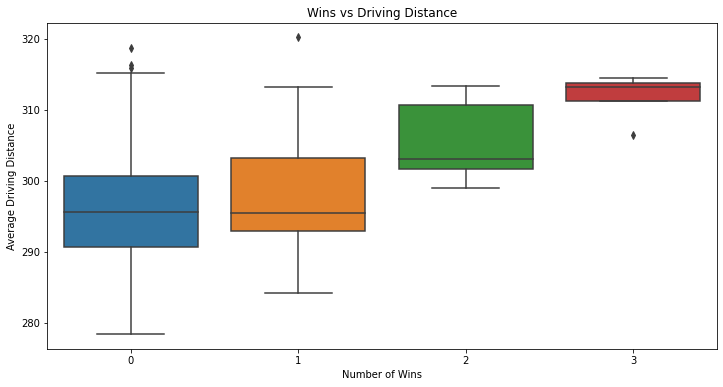

In [128]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'NUMBER_OF_WINS', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Number of Wins')
plt.ylabel('Average Driving Distance')
plt.title('Wins vs Driving Distance')
plt.show()

Visually see the positive correlation between wins and driving driving distance.  As wins increase, so does mean driving distance.  Also worth noting the whiskers associated with the box plots indicating a smaller standard deviation as wins increase. Thus telling us that higher driving distance players are the player winning more than one tournament during the season.  This is also verified in the above descriptive statistics in the bottom 50% driving distance grouping where the maximum wins in this groups is only 1.


---



Box and Whisker plot of Top 10s vs Driving Distance

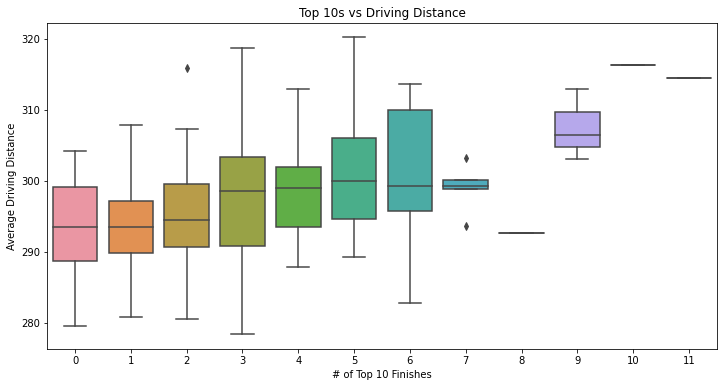

In [129]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'NUMBER_OF_TOP_Tens', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('# of Top 10 Finishes')
plt.ylabel('Average Driving Distance')
plt.title('Top 10s vs Driving Distance')
plt.show()

Again we visually see the positive correlation between top 10 finishes and average driving distance. As the number of top 10 finishes increases so does the mean of driving distance, with the except of 8 wins which only had one player.

---



Regression plot of Money Won vs Driving Distance

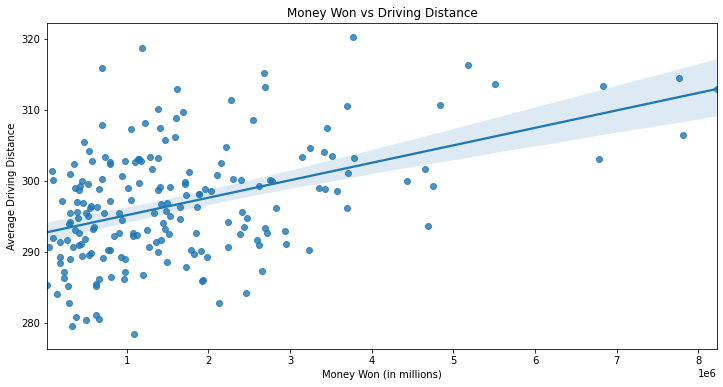

In [130]:
plt.figure(figsize = (12,6))
sns.regplot(x = 'MONEY', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Money Won (in millions)')
plt.ylabel('Average Driving Distance')
plt.title('Money Won vs Driving Distance')
plt.show()

Visually see the positive relationship between money won and driving distance.  As a player increases their driving distance, they tend to win more money on tour.  Especially with the high money winners in 2017 as only players in the top 50% driving distance won over 5 million dollars as the max won in the bottom 50% driving distance was 4.69 million. 


---




T-test analysis between means of top 50% and bottom 50% groupings from data sample

In [131]:
for x in h1_list:
  print(f'The t-test results for {x} column comparing the top and bottom 50% in average driving distance are:')
  print(stats.ttest_ind(top_50_df[x], bottom_50_df[x]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=17.977004473009526, pvalue=2.9831462094179926e-43)


The t-test results for NUMBER_OF_WINS column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=2.263607206946361, pvalue=0.024699518256500137)


The t-test results for NUMBER_OF_TOP_Tens column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=3.4735514944529537, pvalue=0.0006327165997008301)


The t-test results for MONEY column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=4.449060442456906, pvalue=1.4480132101464633e-05)




Statistical significance seen between the two groups in all 3 variables with all p-values <= 0.05.


---



T-test analysis between means of over 300 yard average and under 300 yard average groupings from data sample

In [132]:
for y in h1_list:
  print(f'The t-test results for {y} column comparing the over and under average driving distance of 300 yards are:')
  print(stats.ttest_ind(over_300_df[y], under_300_df[y]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=17.283678491926892, pvalue=4.681984277618193e-41)


The t-test results for NUMBER_OF_WINS column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=3.164830495977456, pvalue=0.0018032590013044387)


The t-test results for NUMBER_OF_TOP_Tens column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=4.11407182735084, pvalue=5.752419264872462e-05)


The t-test results for MONEY column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=4.872578015825289, pvalue=2.2911126223226177e-06)




Statistical significance seen between the two groups in all 3 variables with all p-values <= 0.05. All p-values indicating more statistical significance between over/under 300 yard groupings than between top/bottom 50% groupings. 


---



Summary and Conclusion of H1 Testing:


*   Higher mean and median wins, top 10s and money won in top 50% driving distance grouping compared to bottom 50% driving distance grouping.
*   Higher mean and median wins, top 10s and money won in over 300 yard average driving distance grouping compared to top 50% driving distance grouping.
*   High positive correlation across all 3 variables with increased driving distance.
*   Statistically significant with a p-value of 0.024, 0.0006, and 1.448e-05 in wins, top 10s, and money won between the top 50% and bottom 50% groupings, respectively.
*   More statistical significance between over/under 300 yard groupings than between top/bottom 50% groupings.
---
*   **Reject the null hypothesis and accept the alternate hypotheseis that players with higher average driving distance will have more success on PGA Tour.**







##Hypothesis 2 Analysis





*   **HO = Players with higher average driving distance will not have better strokes gained per round.**
*   **HA = Players with higher average driving distance will have better strokes gained per round.**





Create list of variables for H2 analysis for all strokes gained statistics

In [133]:
h2_list = (['AVG_Driving_DISTANCE','SG_PER_ROUND', 'SG:OTT', 'SG:APR', 'SG:ARG', 'TOTAL_SG:PUTTING'])



---


Descriptive Statistics for H2 in Bottom 50%, Top 50%, and Over 300 yard driving distance groupings:

In [134]:
bottom_50_df[h2_list].describe()

,AVG_Driving_DISTANCE,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,TOTAL_SG:PUTTING
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,290.298980,-0.101908,-0.139622,0.008949,0.028704,4.740327
std,4.222143,0.689527,0.393084,0.368360,0.223597,18.167656
min,278.400000,-2.840000,-1.443000,-1.586000,-0.924000,-42.673000
25%,287.950000,-0.486000,-0.305000,-0.166750,-0.119000,-6.083250
50%,291.050000,-0.020000,-0.064500,0.021500,0.019500,5.564000
75%,293.350000,0.301250,0.111750,0.266250,0.193000,15.160000
max,296.200000,1.479000,0.587000,0.975000,0.632000,46.404000


In [135]:
top_50_df[h2_list].describe()

,AVG_Driving_DISTANCE,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,TOTAL_SG:PUTTING
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,303.138384,0.376444,0.222525,0.119495,0.034374,1.335343
std,5.687055,0.734549,0.362417,0.414351,0.217316,18.327189
min,296.200000,-3.586000,-1.585000,-1.504000,-0.497000,-40.194000
25%,299.000000,-0.046500,0.027000,-0.120500,-0.124000,-8.627000
50%,301.600000,0.373000,0.229000,0.159000,0.027000,0.810000
75%,305.900000,0.815000,0.412000,0.389500,0.200500,11.107000
max,320.200000,1.987000,1.006000,0.990000,0.629000,60.061000


In [136]:
over_300_df[h2_list].describe()

,AVG_Driving_DISTANCE,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,TOTAL_SG:PUTTING
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,306.083871,0.517323,0.334113,0.136629,0.046548,0.955419
std,5.240172,0.689911,0.312502,0.425042,0.212524,19.276550
min,300.000000,-1.020000,-0.448000,-1.039000,-0.307000,-40.194000
25%,302.425000,0.005750,0.172250,-0.109250,-0.121250,-10.673750
50%,303.800000,0.490000,0.318000,0.154500,0.000500,0.779000
75%,309.475000,1.165250,0.551250,0.408250,0.204500,10.946750
max,320.200000,1.987000,1.006000,0.990000,0.629000,60.061000


We see increases in mean strokes gained per round from bottom 50% to top 50% to over 300 yard groupings. 



---



Look at correlations between all strokes gained variables

In [137]:
h2_list_corr_df = df[h2_list].corr()
h2_list_corr_df

,AVG_Driving_DISTANCE,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,TOTAL_SG:PUTTING
AVG_Driving_DISTANCE,1.000000,0.459917,0.630791,0.205962,0.002735,-0.140773
SG_PER_ROUND,0.459917,1.000000,0.777071,0.839260,0.429187,-0.110525
SG:OTT,0.630791,0.777071,1.000000,0.423156,-0.005909,-0.196581
SG:APR,0.205962,0.839260,0.423156,1.000000,0.263644,-0.141153
SG:ARG,0.002735,0.429187,-0.005909,0.263644,1.000000,0.248778
TOTAL_SG:PUTTING,-0.140773,-0.110525,-0.196581,-0.141153,0.248778,1.000000




*   We see positive correlations between average driving distance and strokes gained per round with .45 correlation.
*   Also notice a very high correlation with strokes gained off the tee but as shots are being hit closer to the green the correlation to driving distance lowers and is negative with total strokes gained putting.






Heatmap of correlations with the more red being closer to -.20 correlation and the more green close to 1.0 positive correlation

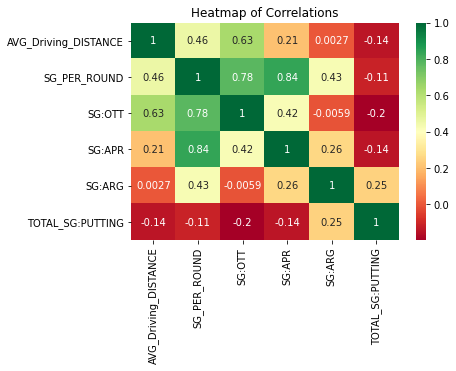

In [138]:
sns.heatmap(h2_list_corr_df, annot = True, cmap = 'RdYlGn')
plt.title('Heatmap of Correlations')
plt.show()



---
Regression plot of Strokes Gained per round vs Driving Distance


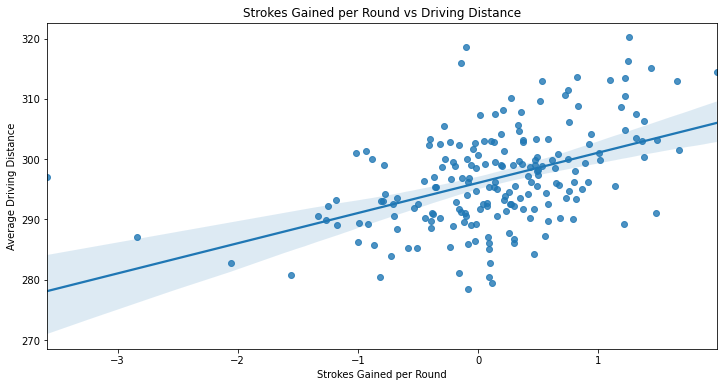

In [139]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'SG_PER_ROUND', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Strokes Gained per Round')
plt.ylabel('Average Driving Distance')
plt.title('Strokes Gained per Round vs Driving Distance')
plt.show()

Visually see the positive correlation between driving distance and strokes gained per round.  We can also see that as average driving distance increases so the min and max strokes gained per round, meaning that the players floors and ceilings also increase.


---



Visualizations of other strokes gained statistics vs driving distance 

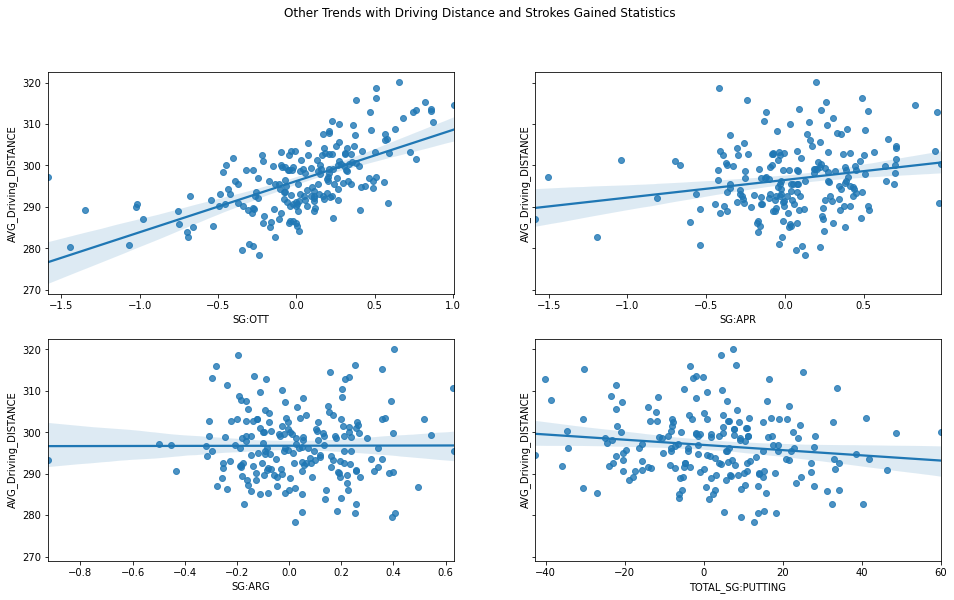

In [140]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9), sharey=True)
fig.suptitle('Other Trends with Driving Distance and Strokes Gained Statistics')

#SG:OTT
sns.regplot(ax=axes[0,0], x = 'SG:OTT', y='AVG_Driving_DISTANCE', data = df)

#SG:APR
sns.regplot(ax=axes[0,1], data = df, x = 'SG:APR', y='AVG_Driving_DISTANCE')

#SG:ARG
sns.regplot(ax=axes[1,0], data = df, x = 'SG:ARG', y='AVG_Driving_DISTANCE')

#TOTAL_SG:PUTTING
sns.regplot(ax=axes[1,1], data = df, x = 'TOTAL_SG:PUTTING', y='AVG_Driving_DISTANCE')


plt.show()

Here we can visually see what was noticed in the correlation testing. As players with higher average driving distances off the tee hit shots closer to the green, their strokes gained statistics become worse and eventually have a negative trendline with total strokes gained putting.  


---



Run t-tests for statistical significance between top and bottom 50% players

In [141]:
for x in h2_list:
  print(f'The t-test results for {x} column comparing the top and bottom 50% in average driving distance are:')
  print(stats.ttest_ind(top_50_df[x], bottom_50_df[x]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=17.977004473009526, pvalue=2.9831462094179926e-43)


The t-test results for SG_PER_ROUND column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=4.711458528569094, pvalue=4.666726706320066e-06)


The t-test results for SG:OTT column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=6.723739272937005, pvalue=1.9097909964039726e-10)


The t-test results for SG:APR column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=1.9782929293867122, pvalue=0.04930375538317859)


The t-test results for SG:ARG column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=0.18047586471968233, pvalue=0.8569664244349027)


The t-test results for TOTAL_SG:PUTTING column comparing the top and bottom 50%


*   Statistically significant strokes gained per round between the top 50% and bottom 50% average driving distance groupings with a p-value of 4.66e-06.
*   Also see statistical significance between stroked gained off the tee and approach shot but not in strokes gained around the green and putting. 



Run t-tests for statistical significance between over and under 300 yards average driving distance

In [142]:
for y in h2_list:
  print(f'The t-test results for {y} column comparing the over and under average driving distance of 300 yards are:')
  print(stats.ttest_ind(over_300_df[y], under_300_df[y]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=17.283678491926892, pvalue=4.681984277618193e-41)


The t-test results for SG_PER_ROUND column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=5.136166108405067, pvalue=6.827833962369511e-07)


The t-test results for SG:OTT column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=7.5524519484132435, pvalue=1.6623456136910585e-12)


The t-test results for SG:APR column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=1.8121738656511948, pvalue=0.07151351629223547)


The t-test results for SG:ARG column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=0.622305786166279, pvalue=0.5344753280212086)


The t-test results for TOTAL_SG:PUTTING column comp


*   Statistically significant strokes gained per round between the over 300 yard and under 300 yard average driving distance groupings with a p-value of 6.82e-07.
*   Also see statistical significance between stroked gained off the tee but not in strokes gained appoach, around the green, and putting. 


---



Summary and Conclusion of H2 Testing:




*   Higher strokes gained per round mean in top 50% vs bottom 50% driving distance groupings by .477 strokes, leading to 1.908 saved strokes per 4 round tournament
*   High positive correlation of .45 between average driving distance and strokes gained per round.
* Statistical signifance in strokes gained per round between top 50% and bottom 50% as well as over 300 and under 300 driving distance groupings with p values of 4.66e-06 and 6.82e-07, respectively. 
---
*   **Reject the null hypothesis and accept the alternate hypothesis that players with higher average driving distance will have better strokes gained per round.**

---
Other insights gained related to strokes gained statistics:
*   Closer shots occur to the hole, the lower the correlation of strokes gained to driving distance
*   Even though strokes gained per round were statistically significant between groupings, SG:Around the Green and Putting were not statistically significant.
*   Thus the data shows that even though the longer drivers lose their once held advantage off the tee, the down trend is very close to even and not significant and leads to their high strokes gained per round statistics.




##Hypothesis 3 Analysis

*   **HO = Players with higher average driving distance will not have lower scoring averages**
*   **HA = Players with higher average driving distance will have lower scoring averages**

---



Create list of variables for H3 analysis

In [143]:
h3_list = (['AVG_Driving_DISTANCE', 'AVG_SCORE','PAR_OR_BETTER'])



---


Descriptive Statistics for H3 in Bottom 50%, Top 50%, and Over 300 yard driving distance groupings:


In [144]:
bottom_50_df[h3_list].describe()

,AVG_Driving_DISTANCE,AVG_SCORE,PAR_OR_BETTER
count,98.000000,98.000000,98.000000
mean,290.298980,71.131173,263.102041
std,4.222143,0.755630,58.600603
min,278.400000,69.311000,136.000000
25%,287.950000,70.602750,216.000000
50%,291.050000,71.031000,276.000000
75%,293.350000,71.518250,303.750000
max,296.200000,73.624000,392.000000


In [145]:
top_50_df[h3_list].describe()

,AVG_Driving_DISTANCE,AVG_SCORE,PAR_OR_BETTER
count,99.000000,99.000000,99.000000
mean,303.138384,70.658606,249.373737
std,5.687055,0.812773,46.666114
min,296.200000,68.702000,156.000000
25%,299.000000,70.224000,213.500000
50%,301.600000,70.734000,245.000000
75%,305.900000,71.048500,282.000000
max,320.200000,74.891000,356.000000


In [146]:
over_300_df[h3_list].describe()

,AVG_Driving_DISTANCE,AVG_SCORE,PAR_OR_BETTER
count,62.000000,62.00000,62.000000
mean,306.083871,70.52900,250.048387
std,5.240172,0.77230,49.008005
min,300.000000,68.70200,156.000000
25%,302.425000,70.11425,213.250000
50%,303.800000,70.71100,244.500000
75%,309.475000,70.95825,288.500000
max,320.200000,72.25100,352.000000


 


*   Notice a lower mean and median of average score from the bottom 50% to top 50% and over 300 yard driving distance groupings.
*   Also see lower mean and median with par or better from the bottom 50% to top 50% and over 300 yard driving distance groupings.  Possibility indicating that longer drivers have more birdies and eagles but also more bogeys or worse too.

---



Look at correlations between average driving distance, average score and pars or better.

In [147]:
h3_list_corr_df = df[h3_list].corr()
h3_list_corr_df

,AVG_Driving_DISTANCE,AVG_SCORE,PAR_OR_BETTER
AVG_Driving_DISTANCE,1.000000,-0.400943,-0.152336
AVG_SCORE,-0.400943,1.000000,-0.077790
PAR_OR_BETTER,-0.152336,-0.077790,1.000000


Confirm the negative correlation between average driving distance and average scoring, so the higher the driving distance the lower that player scores.




Heatmap of correlations with the more red being closer to -.40 correlation and the more green close to 1.0 positive correlation

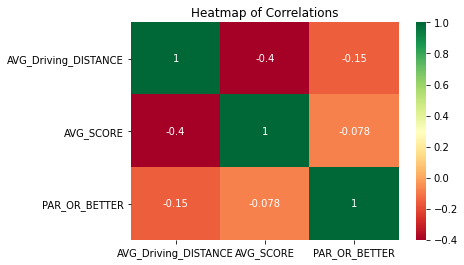

In [148]:
sns.heatmap(h3_list_corr_df, annot = True, cmap = 'RdYlGn')
plt.title('Heatmap of Correlations')
plt.show()



---
Regression plot of Average Score vs Driving Distance


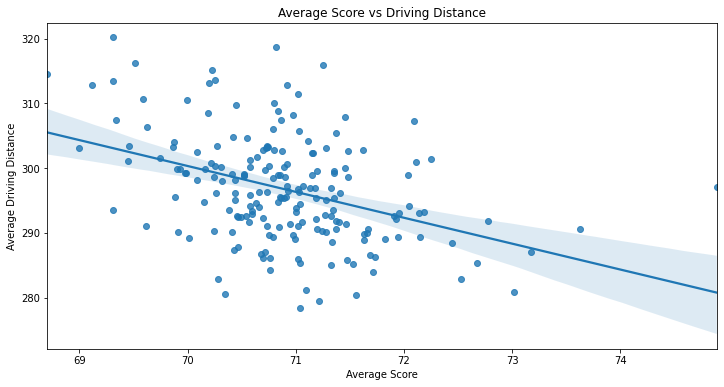

In [149]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'AVG_SCORE', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Average Score')
plt.ylabel('Average Driving Distance')
plt.title('Average Score vs Driving Distance')
plt.show()

We can see the negative relationship between driving distacne and average score. The further the player hits it, the lower their average score trends.



---



Regression plot of Par or Better Holes vs Driving Distance

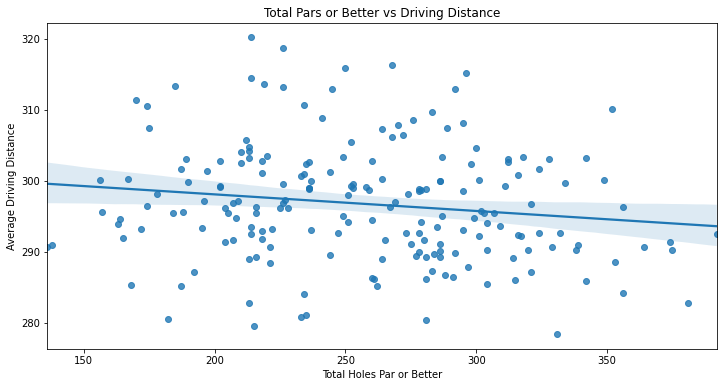

In [150]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'PAR_OR_BETTER', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Total Holes Par or Better')
plt.ylabel('Average Driving Distance')
plt.title('Total Pars or Better vs Driving Distance')
plt.show()

See that players with increased driving distances actually have less pars or better during the season than shorter drivers. It is clearly negative but has a low correlation of -.15.


---



Run t-tests for statistical significance between top and bottom 50% players

In [151]:
for x in h3_list:
  print(f'The t-test results for {x} column comparing the top and bottom 50% in average driving distance are:')
  print(stats.ttest_ind(top_50_df[x], bottom_50_df[x]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=17.977004473009526, pvalue=2.9831462094179926e-43)


The t-test results for AVG_SCORE column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=-4.225368653932252, pvalue=3.6606668081070745e-05)


The t-test results for PAR_OR_BETTER column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=-1.8198240595544244, pvalue=0.07031918864409493)




Statistically significant for the average score between the top 50% and bottom 50% average driving distance groupings with a p-value of 3.66e-05.

Run t-tests for statistical significance between over and under 300 yards average driving distance

In [152]:
for y in h3_list:
  print(f'The t-test results for {y} column comparing the over and under average driving distance of 300 yards are:')
  print(stats.ttest_ind(over_300_df[y], under_300_df[y]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=17.283678491926892, pvalue=4.681984277618193e-41)


The t-test results for AVG_SCORE column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=-4.431973933828141, pvalue=1.5640004669604865e-05)


The t-test results for PAR_OR_BETTER column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=-1.1746633958676564, pvalue=0.24157668212690542)




Statistically significant for the average score between the over 300 and under 300 yard average driving distance groupings with a p-value of 1.56e-05.

Summary and Conclusion of H3 Testing:



*   Lower mean average score in top 50% group vs bottom 50% group.
*   Even slightly lower mean score in over 300 year group compared to top 50% group.
*   Negative correlation seen between average score and driving distance. Meaning the longer the driving distance, the lower the score.
*   Statistical signifance for average score between top 50% and bottom 50% as well as over 300 and under 300 driving distance groupings with p values of 3.66e-05 and 1.56e-05, respectively. 

---


*   **Again reject the null hypothesis and accept the alternate hypothesis that players with higher average driving distance will have lower scoring averages.**

---
*   Interesting to see a negative correlation with driving distance and total pars or better, especially with a lower average score in longer driving distances
*   This likely means that players with increased driving distance score more birdies and eagles, but also more bogeys or worse

##Other Trends Related to Driving Distance

Create list of variables to analyze

In [153]:
h4_list = (['AVG_Driving_DISTANCE', 'AGE','FAIRWAY_HIT_%','Three_PUTT%','GOING_FOR_GREEN_IN_2%','RTP-GOING_FOR_THE_GREEN','RTP-NOT_GOING_FOR_THE_GRN'])



---


Correlation testing of other numeric variables to see relationship to driving distance

In [154]:
h4_list_corr_df = df[h4_list].corr()
h4_list_corr_df

,AVG_Driving_DISTANCE,AGE,FAIRWAY_HIT_%,Three_PUTT%,GOING_FOR_GREEN_IN_2%,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN
AVG_Driving_DISTANCE,1.000000,-0.251643,-0.398160,0.141663,0.811614,-0.544856,0.298993
AGE,-0.251643,1.000000,0.131303,-0.137907,-0.262759,0.227949,-0.167852
FAIRWAY_HIT_%,-0.398160,0.131303,1.000000,-0.001424,-0.223826,0.065038,-0.392998
Three_PUTT%,0.141663,-0.137907,-0.001424,1.000000,0.150796,0.011321,0.247174
GOING_FOR_GREEN_IN_2%,0.811614,-0.262759,-0.223826,0.150796,1.000000,-0.588978,0.462078
RTP-GOING_FOR_THE_GREEN,-0.544856,0.227949,0.065038,0.011321,-0.588978,1.000000,-0.026066
RTP-NOT_GOING_FOR_THE_GRN,0.298993,-0.167852,-0.392998,0.247174,0.462078,-0.026066,1.000000


See high correlations between driving distance and the following variables: fairways hit (- correlation), going for green in 2 (+ correlation), score relative to par when going for green (+ correlation).

Heatmap of correlations with the more red being closer to -.60 correlation and the more green close to 1.0 positive correlation

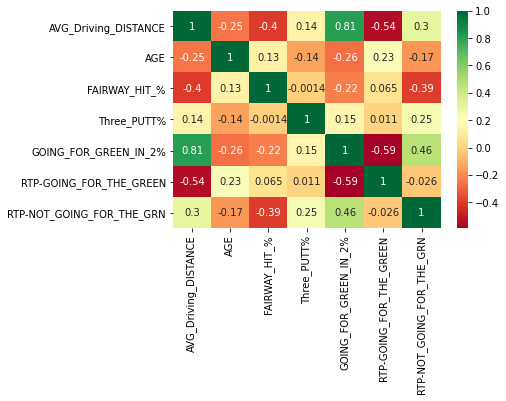

In [155]:
sns.heatmap(h4_list_corr_df, annot = True, cmap = 'RdYlGn')
plt.show()



---
Visualizations of remaining numeric data related to driving distance


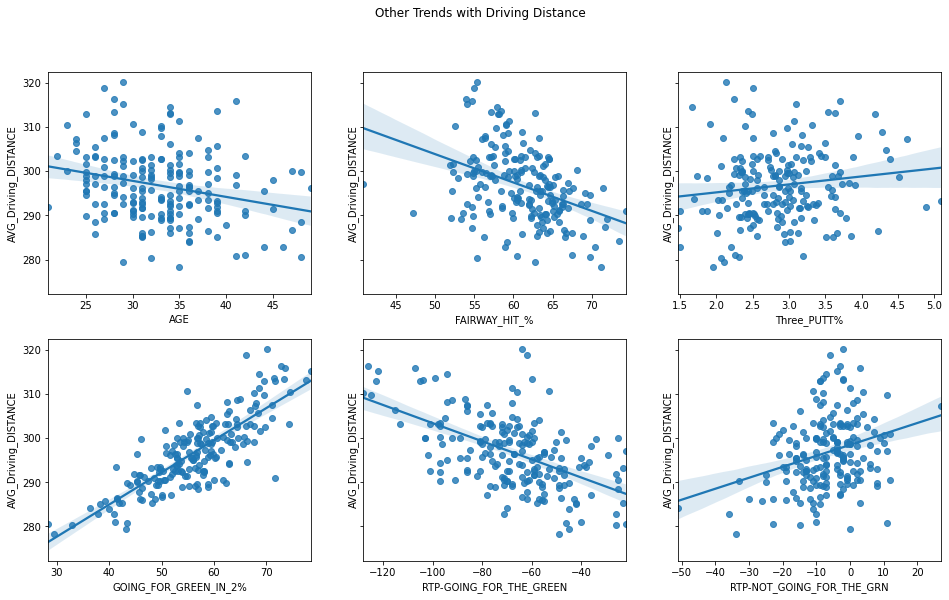

In [156]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True)
fig.suptitle('Other Trends with Driving Distance')

#Age
sns.regplot(ax=axes[0,0], data = df, x = 'AGE', y='AVG_Driving_DISTANCE')

#FAIRWAY_HIT_%
sns.regplot(ax=axes[0,1], data = df, x = 'FAIRWAY_HIT_%', y='AVG_Driving_DISTANCE')

#Three_PUTT%
sns.regplot(ax=axes[0,2], data = df, x = 'Three_PUTT%', y='AVG_Driving_DISTANCE')

#GOING_FOR_GREEN_IN_2%
sns.regplot(ax=axes[1,0], data = df, x = 'GOING_FOR_GREEN_IN_2%', y='AVG_Driving_DISTANCE')

#RTP-GOING_FOR_THE_GREEN
sns.regplot(ax=axes[1,1], data = df, x = 'RTP-GOING_FOR_THE_GREEN', y='AVG_Driving_DISTANCE')

#'RTP-NOT_GOING_FOR_THE_GRN
sns.regplot(ax=axes[1,2], data = df, x = 'RTP-NOT_GOING_FOR_THE_GRN', y='AVG_Driving_DISTANCE')

plt.show()



*   As players get older, driving distance declines
*   Increased driving distance, leads to decreased accuracy which likely plays a role in more volatility in scoring in longer hitters as seen earlier in analysis.
*   Increased driving distances has slight increases in 3 putt percentage
*   As expected, increaed driving distances is highly correlated with going the green in 2 on par 5 holes.
*   Relative to par scoring when going for green in 2 is negatively correlated with driving distance. Thus going for a par 5 in 2 should be chosen whenever able to.
*   Interestingly, shorter average driving distance players score better on par 5 holes when not going for the green in 2 compared to longer hitters.  Likley because they are typically better wedge players and better putters.





##Factors Into Increased Driving Distance



Create list of variables in dataset to analyze to determine which variables lead to highest increase in driving distance

In [157]:
driving_dist_factor = ['AVG_Driving_DISTANCE','AVG_CLUB_HEAD_SPEED', 
       'AVG_BALL_SPEED', 'AVG_SMASH_FACTOR', 'AVG_LAUNCH_ANGLE',
       'AVG_SPIN_RATE', 'AVG_HANG_TIME', 'AVG_CARRY_DISTANCE']




---


Correlations of variables related to driving distance

In [158]:
driving_dist_factors_df = df[driving_dist_factor].corr()
driving_dist_factors_df.AVG_Driving_DISTANCE = driving_dist_factors_df.AVG_Driving_DISTANCE.abs()
driving_dist_factors_df

,AVG_Driving_DISTANCE,AVG_CLUB_HEAD_SPEED,AVG_BALL_SPEED,AVG_SMASH_FACTOR,AVG_LAUNCH_ANGLE,AVG_SPIN_RATE,AVG_HANG_TIME,AVG_CARRY_DISTANCE
AVG_Driving_DISTANCE,1.000000,0.864714,0.914823,0.151948,-0.004169,-0.020851,0.420434,0.924587
AVG_CLUB_HEAD_SPEED,0.864714,1.000000,0.960059,-0.167782,-0.035389,0.247314,0.289736,0.845098
AVG_BALL_SPEED,0.914823,0.960059,1.000000,0.114551,-0.011768,0.165379,0.320358,0.901337
AVG_SMASH_FACTOR,0.151948,-0.167782,0.114551,1.000000,0.090226,-0.292332,0.104247,0.176145
AVG_LAUNCH_ANGLE,0.004169,-0.035389,-0.011768,0.090226,1.000000,0.038425,0.071029,0.000931
AVG_SPIN_RATE,0.020851,0.247314,0.165379,-0.292332,0.038425,1.000000,0.177615,0.004018
AVG_HANG_TIME,0.420434,0.289736,0.320358,0.104247,0.071029,0.177615,1.000000,0.536967
AVG_CARRY_DISTANCE,0.924587,0.845098,0.901337,0.176145,0.000931,0.004018,0.536967,1.000000


All variable have a postive correlation to driving distance with club head speed, ball speed, hang time and carry distance all having the highest correlations.

Heatmap of correlations with the more red being closer to no correlation and the more green close to 1.0 positive correlation


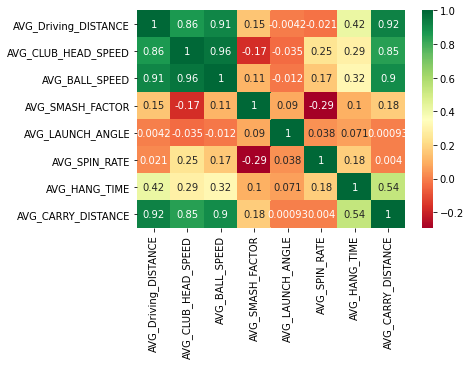

In [159]:
sns.heatmap(driving_dist_factors_df, annot = True, cmap = 'RdYlGn')

plt.show()



---


Visualizations of variables related to driving distance

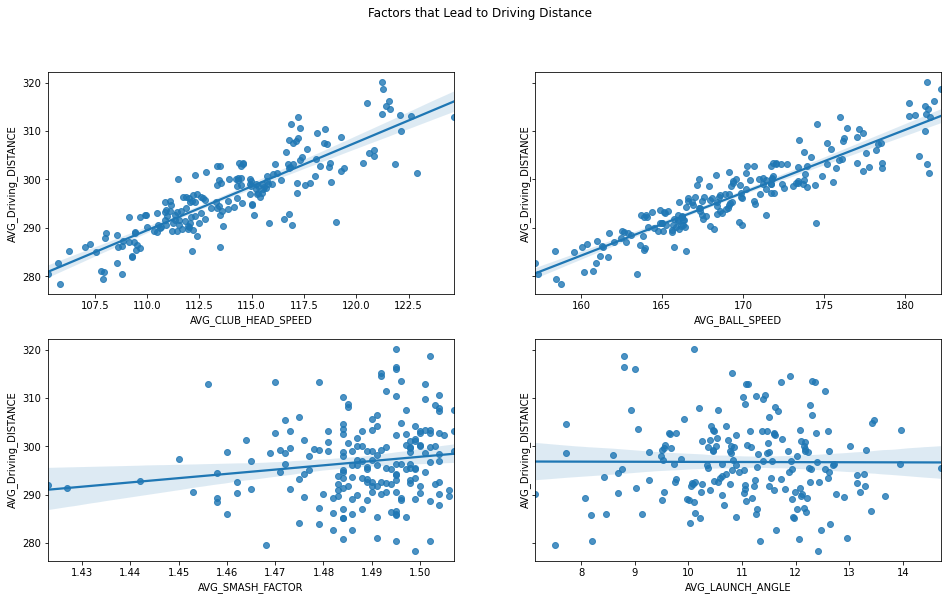

In [160]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9), sharey=True)
fig.suptitle('Factors that Lead to Driving Distance')

#AVG_CLUB_HEAD_SPEED
sns.regplot(ax=axes[0,0], data = df, x = 'AVG_CLUB_HEAD_SPEED', y='AVG_Driving_DISTANCE')

#AVG_BALL_SPEED
sns.regplot(ax=axes[0,1], data = df, x = 'AVG_BALL_SPEED', y='AVG_Driving_DISTANCE')

#AVG_SMASH_FACTOR
sns.regplot(ax=axes[1,0], data = df, x = 'AVG_SMASH_FACTOR', y='AVG_Driving_DISTANCE')

#AVG_LAUNCH_ANGLE
sns.regplot(ax=axes[1,1], data = df, x = 'AVG_LAUNCH_ANGLE', y='AVG_Driving_DISTANCE')

plt.show()



*   Easily see the positive correlation with driving distance and club head speed as well as ball speed which will always be similar to each other and have a correlation of .96.
*   Smash factor has slight uptrend with driving distance 
*   Launch angle appears to have no effect on driving distance 



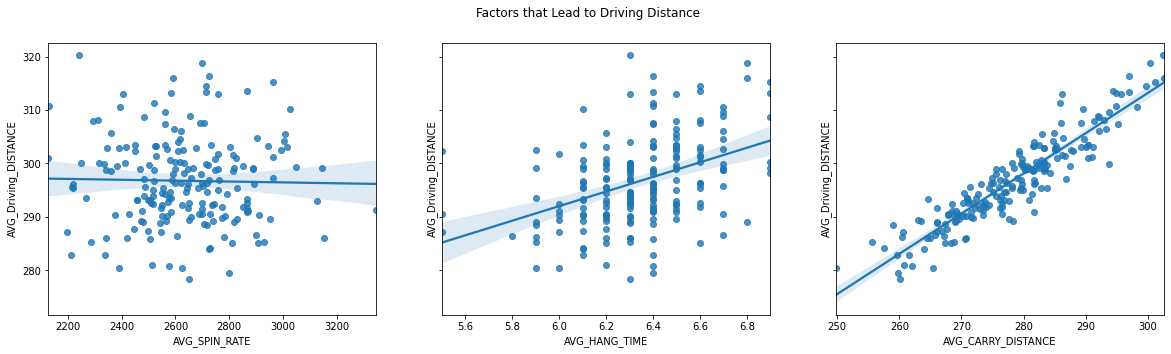

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Factors that Lead to Driving Distance')

#AVG_SPIN_RATE
sns.regplot(ax=axes[0], data = df, x = 'AVG_SPIN_RATE', y='AVG_Driving_DISTANCE')

#AVG_HANG_TIME
sns.regplot(ax=axes[1], data = df, x = 'AVG_HANG_TIME', y='AVG_Driving_DISTANCE')

#AVG_CARRY_DISTANCE
sns.regplot(ax=axes[2], data = df, x = 'AVG_CARRY_DISTANCE', y='AVG_Driving_DISTANCE')


plt.show()



*   We see a positive correlation with driving distance and hang time as well as carry distance. Both of these will increase as a players clubhead speed increases. Since launch angle appears to have no correlation to driving distance, increased hang time and carry distance is likely related to club head speed.  This is seen in correlation testing as well. 

*   There is no correlation between driving distance and spin rate 





##Recommendations from hypotheses and other insights from analysis


Based on data analysis, all alternate hypotheses were accepted below:

1. Players with higher average driving distance will have more success on PGA Tour.
2. Players with higher average driving distance will have better strokes gained per round.
3. Players with higher average driving distance will have lower scoring averages


Thus increased driving distance leads to improved stats across most major statistical categories including:
1.   Wins
2.   Top 10s
3.   Money Won
4.   Strokes Gained per Round
5.   Average Score

Recommendations from analysis:

*   Any golfer, both professional and amateur, who wants to shoot lower scores and have more success on the golf course should work to increase their driving distance. This would include working with a fitness professional to improve power, strength, and flexibility as well as a swing coach to improve swing technique.

*   Validates the work of many fitness professionals who work with golfers virtually, at home, or in the gym to increase their strength, flexibility, and power to increased their distance to better success on the golf course. 

*   Work to increase club head speed as it lead to the highest increase is driving distance as is correlated with other factors that lead to increased distance as well.

*   Once increased driving distance is obtained, expect more missed fairways as well as more volatility in scoring during rounds.

*   Expect driving distance to decrease as golfers age. 

*   If able to go for the green in 2 on a par 5, always go for it as it will lead to a lower score more often than not.

*   Not all golfers will be able to increase driving distance due to their past medical history or prior injuires and should consult with a medical professional attempting.

Future Analysis Recommendations:

*   This analysis was only completed from statistics from one season and would be beneifical to include data from more seasons to verify this information.

*   Would also be benefical to complete a further analysis comparing importance of driving distance vs other aspects of golf including, approach shots, shots around the green, and putting.



